In [138]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.table import Table
%matplotlib inline

In [129]:
# EJECUTE ESTE CODIGO
# Definimos la funcion plot_mwd para hacer graficos en una proyección del tipo Mollweide

def plot_mwd(l,b,org=0,title='Mollweide projection', projection='mollweide', label='', label_id=''):
    x = np.remainder(l+360-org,360) # shift RA values
    ind = x>180
    x[ind] -=360    # scale conversion to [-180, 180]
    x=np.radians(-x)    # reverse the scale: East to the left
    y=np.radians(b)
    tick_labels = np.array([150, 120, 90, 60, 30, 0, 330, 300, 270, 240, 210])
    tick_labels = np.remainder(tick_labels+360+org,360)

    fig = plt.figure(figsize=(12, 6))
    ax = fig.add_subplot(111, projection=projection, axisbg ='LightCyan')
    ax.scatter(x, y, marker='o', s=15, facecolor='red', edgecolor='', alpha=0.7)  # convert degrees to radians
    ax.set_xticklabels(tick_labels, alpha=0.4)     # we add the scale on the x axis
    ax.set_title(title)
    ax.title.set_fontsize(15)
    ax.set_xlabel("Longitud")
    ax.xaxis.label.set_fontsize(12)
    ax.set_ylabel("Latitud")
    ax.yaxis.label.set_fontsize(12)
    
    if type(label_id)==int:
        label_id=(label_id,)
    try:
        for i in range(len(label_id)): 
            ax.annotate(unicode(label[label_id[i]], "utf-8"), xy=(x[label_id[i]], y[label_id[i]]), xytext=(x[label_id[i]]+2e-1, y[label_id[i]]+1e-1), fontsize=10, arrowprops=dict(facecolor='black', shrink=0.2, width=0.5, frac=0.2, headwidth=4))
    except:
        print ''
    ax.grid(True)

In [140]:
# Cargamos catalogo de las galaxias del grupo local
# La distancia y el diametro esta en unidades de kpc

cat_url='https://raw.githubusercontent.com/rpmunoz/PentaUC/master/Astronomia%20era%20informacion/data/catalogo_grupo_local.csv'
cat_data=pd.read_csv(cat_url,header=0,sep=',')

cat_data=Table.read(cat_url, format='ascii.csv')
cat_data.head()

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 37: ordinal not in range(128)

In [75]:
# Ordenemos las galaxias de acuerdo a su diametro. Ordenamos de mayor a menor tamano

cat_data.sort_values('diametro',ascending=False)

,nombre,l,b,distancia,diametro,tipo
36,Andromeda,121.2,-21.6,784.90,42.92,Sb
0,Vía Lactea,0.0,0.0,0.00,27.59,SBbc
44,Galaxia del Triangulo,133.6,-31.3,838.56,16.86,Sc
51,NGC 3109,262.1,23.1,1249.40,7.67,Irr
4,Gran nube de Magallanes,280.5,-32.9,50.59,7.67,SBm
1,Sagittarius Dwarf,5.6,-14.1,23.91,6.13,dSph
5,Pequeña nube de Magallanes,302.8,-44.3,59.79,4.60,SBm
42,M110,120.7,-21.7,824.76,4.60,dSph/dE5
52,Sextans A,246.2,39.9,1333.72,3.07,dIrr
47,WLM,75.9,-73.6,925.94,3.07,Irr


In [132]:
# Anote el ID de la galaxia Andromeda
id_andromeda=36
cat_data.loc[id_andromeda]

nombre       Andromeda             
l                             121.2
b                             -21.6
distancia                     784.9
diametro                      42.92
tipo                      Sb       
Name: 36, dtype: object

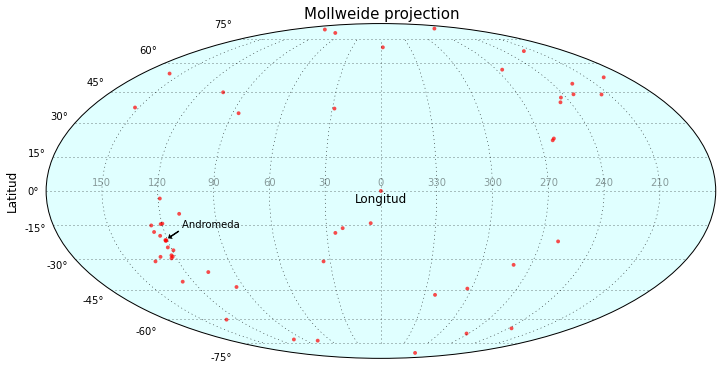

In [133]:
# Haga un grafico del tipo Mollweide de como se distribuyen las galaxias en el cielo. Use Complete label_id y label_text
plot_mwd(cat_data['l'], cat_data['b'], label=cat_data['nombre'], label_id=id_andromeda)

In [130]:
# Anote el ID de la pequeña y gran nube de magallanes
id_magallanes=[4,5]
cat_data.loc[id_magallanes]

,nombre,l,b,distancia,diametro,tipo
4,Gran nube de Magallanes,280.5,-32.9,50.59,7.67,SBm
5,Pequeña nube de Magallanes,302.8,-44.3,59.79,4.60,SBm


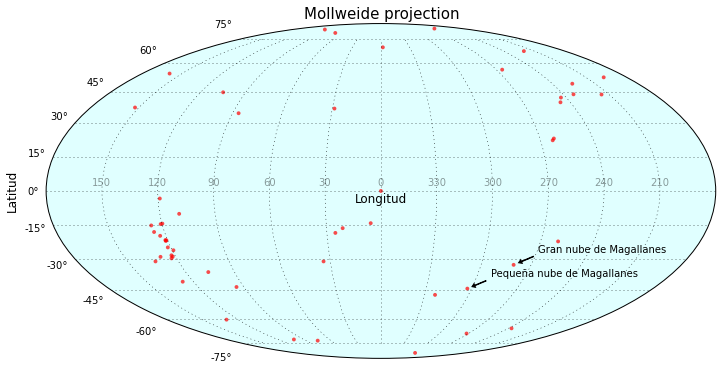

In [131]:
# 
ax=plot_mwd(cat_data['l'],cat_data['b'], label=cat_data['nombre'], label_id=id_magallanes)

In [134]:
from astropy.coordinates import SkyCoord, Distance
from astropy import units as u

In [137]:
cat_data['l']

0       0.0
1       5.6
2     152.5
3     241.9
4     280.5
5     302.8
6     358.0
7     105.0
8     287.5
9      86.4
10    243.4
11    159.4
12    260.1
13    237.1
14     28.7
15    113.6
16    265.4
17    220.2
18     74.3
19    226.0
20    214.9
21    272.2
22     25.3
23    120.8
24    128.9
25    196.9
26    129.8
27    125.8
28    119.8
29    119.3
30    109.5
31    101.4
32    123.2
33    121.7
34    126.8
35    126.2
36    121.2
37    121.7
38    122.0
39    123.0
40    106.1
41    121.2
42    120.7
43    119.0
44    133.6
45    322.9
46     94.8
47     75.9
48     34.0
49     21.1
50    263.1
51    262.1
52    246.2
53    233.2
Name: l, dtype: float64

In [135]:
coo = SkyCoord(l=cat_data['l']*u.degree, b=cat_data['b']*u.degree, distance=cat_data['distancia']*u.kpc)

AttributeError: 'numpy.float64' object has no attribute 'unit'